<a href="https://colab.research.google.com/github/pahsantana/IEEE_ML_ORION/blob/main/IEEE_orion_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Libraries used in our cubesat team by communication division (IEEE UFABC Orion Satellite Systems) ***

In [ ]:
# Library used for working with arrays. It also has functions for working in domain of linear algebra.
import numpy as np 
# Library used for data structures and data analysis tools
import pandas as pd 
#Comprehensive library for creating static, animated, and interactive visualizations 
import matplotlib.pyplot as plt 
#PIL is the Python Imaging Library which provides the python interpreter with image editing capabilities.(read, plot, etc)
from PIL import Image 
# the glob module is used to retrieve files/pathnames matching a specified pattern. The pattern rules of glob follow standard Unix path expansion rules.
from glob import glob 
#import cv2  

%matplotlib inline



## **Creating datasets which contains the directory for every image**

-Importing/cloning the dataset found out in Kaggle platform

*  https://github.com/cuilimeng/CrackForest-dataset
*  https://data.mendeley.com/datasets/xnzhj3x8v4/2



In [ ]:
import zipfile
!unzip /content/CrackForest-dataset-master.zip

Archive:  /content/CrackForest-dataset-master.zip
   creating: CrackForest-dataset-master/
  inflating: CrackForest-dataset-master/README.md  
   creating: CrackForest-dataset-master/groundTruth/
  inflating: CrackForest-dataset-master/groundTruth/001.mat  
  inflating: CrackForest-dataset-master/groundTruth/002.mat  
  inflating: CrackForest-dataset-master/groundTruth/003.mat  
  inflating: CrackForest-dataset-master/groundTruth/004.mat  
  inflating: CrackForest-dataset-master/groundTruth/005.mat  
  inflating: CrackForest-dataset-master/groundTruth/006.mat  
  inflating: CrackForest-dataset-master/groundTruth/007.mat  
  inflating: CrackForest-dataset-master/groundTruth/008.mat  
  inflating: CrackForest-dataset-master/groundTruth/009.mat  
  inflating: CrackForest-dataset-master/groundTruth/010.mat  
  inflating: CrackForest-dataset-master/groundTruth/011.mat  
  inflating: CrackForest-dataset-master/groundTruth/012.mat  
  inflating: CrackForest-dataset-master/groundTruth/013.mat 

In [ ]:
import zipfile
!unzip /content/Asphalt-Crack-Dataset.zip

Archive:  /content/Asphalt-Crack-Dataset.zip
   creating: Asphalt Crack Dataset/
   creating: Asphalt Crack Dataset/448/
   creating: Asphalt Crack Dataset/448/NonCracks/
  inflating: Asphalt Crack Dataset/448/NonCracks/IMG_20180705_130741989 resized_448.jpg  
  inflating: Asphalt Crack Dataset/448/NonCracks/IMG_8710 resized_448.jpg  
  inflating: Asphalt Crack Dataset/448/NonCracks/IMG_8789 resized_448.jpg  
  inflating: Asphalt Crack Dataset/448/NonCracks/IMG_20180705_130743987 resized_448.jpg  
  inflating: Asphalt Crack Dataset/448/NonCracks/IMG_8800 resized_448.jpg  
  inflating: Asphalt Crack Dataset/448/NonCracks/IMG_8798 resized_448.jpg  
  inflating: Asphalt Crack Dataset/448/NonCracks/IMG_20180705_130742988 resized_448.jpg  
  inflating: Asphalt Crack Dataset/448/NonCracks/IMG_8701 resized_448.jpg  
  inflating: Asphalt Crack Dataset/448/NonCracks/IMG_8699 resized_448.jpg  
  inflating: Asphalt Crack Dataset/448/NonCracks/IMG_20180705_130748649 resized_448.jpg  
  inflating: 

**ACTIVITIES**

1. Giving acess to our directory of the images used
2. Creating a dataset with all the directories of images



In [ ]:
# Access the directory with images
data_dir = './CrackForest-dataset-master/image' 
# Create a dataset with all image directories
image_files = glob(data_dir + '/*.jpg') 

# Access the directory with crack images
data_dir_asphalt_crack = './Asphalt Crack Dataset/448/Cracks'
# Create a dataset with all crack image directories
asphalt_crack_files = glob(data_dir_asphalt_crack + '/*.jpg')

# Access the directory with noncrack images
data_dir_asphalt_noncrack = './Asphalt Crack Dataset/448/NonCracks' 
# Create a dataset with all noncrack image directories
asphalt_noncrack_files = glob(data_dir_asphalt_noncrack + '/*.jpg')

In [ ]:
#Visualizing the files 

image_files

['/content/CrackForest-dataset-master/image/310.jpg',
 '/content/CrackForest-dataset-master/image/329.jpg',
 '/content/CrackForest-dataset-master/image/067.jpg',
 '/content/CrackForest-dataset-master/image/086.jpg',
 '/content/CrackForest-dataset-master/image/110.jpg',
 '/content/CrackForest-dataset-master/image/032.jpg',
 '/content/CrackForest-dataset-master/image/102.jpg',
 '/content/CrackForest-dataset-master/image/033.jpg',
 '/content/CrackForest-dataset-master/image/316.jpg',
 '/content/CrackForest-dataset-master/image/005.jpg',
 '/content/CrackForest-dataset-master/image/031.jpg',
 '/content/CrackForest-dataset-master/image/066.jpg',
 '/content/CrackForest-dataset-master/image/098.jpg',
 '/content/CrackForest-dataset-master/image/044.jpg',
 '/content/CrackForest-dataset-master/image/027.jpg',
 '/content/CrackForest-dataset-master/image/103.jpg',
 '/content/CrackForest-dataset-master/image/051.jpg',
 '/content/CrackForest-dataset-master/image/048.jpg',
 '/content/CrackForest-datas

In [ ]:
# A função abaixo vai criar 2 datasets contendo os pixels de cada imagem contida no dataset dos Diretórios   
# O primeiro dataset contém as imgs originais, o segundo contém as imgs rotacionadas em 180°
# E no final vai nos retornar um dataset que junta os dois anteriores, dessa forma consigo
# duplicar meu número de dados


# The function below will create 2 datasets containing the pixels of each image contained in the directories dataset   
# The first dataset contains the original images, the second contains the images rotated 180 °
# And in the end a dataset will be returned that joins the previous two, that way we can
# duplicate my data number

 # (empty dataframe1, empty rotated dataframe1, directory dataset) 
def df_create_2(df_name, df_name_rotate, image_data): # (dataframe1 vazio, dataframe1 rotacionado vazio, dataset do diretório)    
    for file in range(0, len(image_data),1): # com esse for vamos varrer cada linha do meu dataset com os dir
        img1 = Image.open(image_data[file],'r') # Estamos lendo as imgs do dataset que contém os dirs
        img1 = img1.convert('L') # Transformando a img para greyscale
        img1 = img1.resize((100, 100)) 
        img1_rotate = img1.rotate(180) # Rotacionando a img em 180°
        
        img1_n = np.asarray(img1.getdata(), dtype=np.float64) # Convertendo a img para pixels e salvando em um Numpy Array de 1 dimensão   
        img1_n_rotate = np.asarray(img1_rotate.getdata(), dtype=np.float64) # Fazendo a mesma coisa para a imagem rotacionada
        
        df_name[file] = img1_n # Adicionando os pixels de uma img no dataframe1 vazio
        df_name_rotate[file] = img1_n_rotate # Mesma coisa para as imgs rotacionadas
        
    df_name = df_name.T # Pegando a transposta da Matrix para que as linhas sejam as imagens e as colunas seus pixels
    df_name_rotate = df_name_rotate.T # Pegando a transposta da Matrix para que as linhas sejam as imagens e as colunas seus pixel
    df_concat = pd.concat([df_name,df_name_rotate], ignore_index=True) # Juntando as duas matrizes 
    return df_concat # Retornando o DataFrame(Matriz) Desejada

In [ ]:
# A função abaixo faz a mesma coisa que a df_create_2, porém ela triplica o meu número de imagem
# Ou seja, ela criar três dataframes(matrizes), o primeiro sendo as imgs originais
# O segundo as imgs rotacionadas em 90° e o terceiro as imgs rotacionadas em 180°
def df_create_3(df_name, df_name_rotate90,df_name_rotate180, image_data):
    #df_name = pd.DataFrame()
    for file in range(0, len(image_data),1):
        img1 = Image.open(image_data[file],'r')
        img1 = img1.convert('L') # Makes it greyscale
        img1 = img1.resize((100, 100))
        img1_rotate90 = img1.rotate(90)
        img1_rotate180 = img1.rotate(180)
        
        img1_n = np.asarray(img1.getdata(), dtype=np.float64)
        img1_n_rotate90 = np.asarray(img1_rotate90.getdata(), dtype=np.float64)
        img1_n_rotate180 = np.asarray(img1_rotate180.getdata(), dtype=np.float64)

        df_name[file] = img1_n
        df_name_rotate90[file] = img1_n_rotate90
        df_name_rotate180[file] = img1_n_rotate180
        
    df_name = df_name.T
    df_name_rotate90 = df_name_rotate90.T
    df_name_rotate180 = df_name_rotate180.T #transposed
    df_concat = pd.concat([pd.concat([df_name,df_name_rotate90], ignore_index=True),df_name_rotate180], ignore_index=True)   
    #df_concat = df_concat.reset_index().drop('index', axis=1)
    return df_concat

In [ ]:
# Function: Appling a filter in every image of our DataFrame

def df_filter(df_original):
    df_transformed = pd.DataFrame()
    for k in range(0, len(df_original)-1, 1):
        i = np.asarray(df_original.loc[k,:]).reshape(100,100)
        i_transformed = np.copy(i)
        size_x = i_transformed.shape[0]
        size_y = i_transformed.shape[1]
        filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
        weight  = 1
        for x in range(1,size_x-1):
          for y in range(1,size_y-1):
              convolution = 0.0
              convolution = convolution + (i[x - 1, y-1] * filter[0][0])
              convolution = convolution + (i[x, y-1] * filter[0][1])
              convolution = convolution + (i[x + 1, y-1] * filter[0][2])
              convolution = convolution + (i[x-1, y] * filter[1][0])
              convolution = convolution + (i[x, y] * filter[1][1])
              convolution = convolution + (i[x+1, y] * filter[1][2])
              convolution = convolution + (i[x-1, y+1] * filter[2][0])
              convolution = convolution + (i[x, y+1] * filter[2][1])
              convolution = convolution + (i[x+1, y+1] * filter[2][2])
              convolution = convolution * weight
              if(convolution<0):
                convolution=0
              if(convolution>255):
                convolution=255
              i_transformed[x, y] = convolution

        new_x = int(size_x/2)
        new_y = int(size_y/2)
        newImage = np.zeros((new_x, new_y))
        for x in range(0, size_x, 2):
          for y in range(0, size_y, 2):
            pixels = []
            pixels.append(i_transformed[x, y])
            pixels.append(i_transformed[x+1, y])
            pixels.append(i_transformed[x, y+1])
            pixels.append(i_transformed[x+1, y+1])
            newImage[int(x/2),int(y/2)] = max(pixels)
        df_transformed[k] = newImage.flatten()
    return df_transformed.T

In [ ]:
# DataFrame 1 com imagens de rachaduras, utilizando a função df_create_2
df_crack1 = pd.DataFrame()
df_crack1_rotate = pd.DataFrame()
df_crack1 = df_create_2(df_crack1, df_crack1_rotate, image_files)

# Dataframe 2 com imagens de rachadura, utilizando a função df_create_2
df_crack2 = pd.DataFrame()
df_crack2_rotate = pd.DataFrame()
df_crack2 = df_create_2(df_crack2, df_crack2_rotate, asphalt_crack_files)

# Dataframe 3 combinando os Dataframes 1 e 2, totalizando 710 imagens de rachaduras
df_crack = pd.concat([df_crack1, df_crack2], ignore_index=True)
df_crack_filter = df_filter(df_crack) # É o mesmo dataframe df_crack mas com filtro

# Dataframe with images without cracking on the floor
# Now I call função df_create_3 and triple the number of data that our time have with images without cracking on the floor 
df_non_crack = pd.DataFrame()
df_non_crack_rotate90 = pd.DataFrame()
df_non_crack_rotate180 = pd.DataFrame()
df_non_crack = df_create_3(df_non_crack, df_non_crack_rotate90, df_non_crack_rotate180, asphalt_noncrack_files)

# This is the same df non_crack but with filter

df_non_crack_filter = df_filter(df_non_crack) 

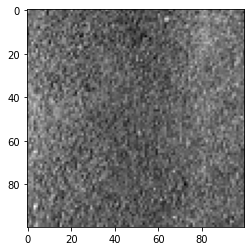

In [ ]:
#Original Image from non_crack df

d = df_non_crack.iloc[1].values.reshape(100,100)
plt.imshow(d, cmap='gray')

plt.show()

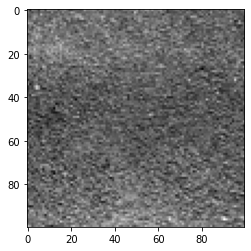

In [ ]:
# Rotate the original image of the non_crack df 90°
d = df_non_crack.iloc[201].values.reshape(100,100)
plt.imshow(d, cmap='gray')

plt.show()

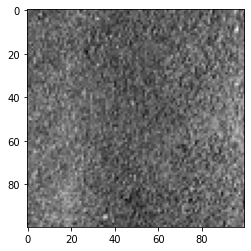

In [ ]:
# Rotate the original image 180° from non_crack df
d = df_non_crack.iloc[401].values.reshape(100,100)
plt.imshow(d, cmap='gray')

plt.show()

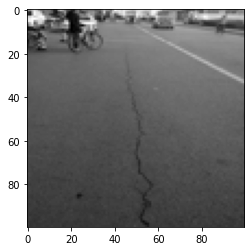

In [ ]:
# Original image from crack df
d = df_crack.iloc[1].values.reshape(100,100)
plt.imshow(d, cmap='gray')

plt.show()

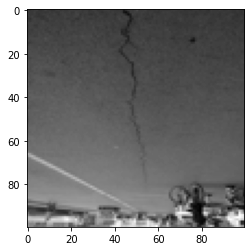

In [ ]:
# Rotate the original image 90°
d = df_crack.iloc[156].values.reshape(100,100)
plt.imshow(d, cmap='gray')

plt.show()

**Inserting a column label with the sigmoid expectated results**

In [ ]:
# Criando a coluna label (target value)
#df_crack.to_csv('df_crack.csv', index=False)
df_crack['label'] = 1
df_crack_filter['label'] = 1
df_crack

0      1      2      3      4  ...   9996   9997   9998   9999  label
0    154.0  153.0  151.0  151.0  151.0  ...  126.0  127.0  129.0  124.0      1
1    163.0  169.0  202.0  226.0  210.0  ...   94.0   92.0   89.0   92.0      1
2    118.0  118.0  124.0  121.0  111.0  ...  108.0  118.0  115.0  110.0      1
3    150.0  154.0  149.0  150.0  148.0  ...  112.0  114.0  109.0  108.0      1
4    139.0  141.0  147.0  147.0  140.0  ...  130.0  114.0  124.0  115.0      1
..     ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
705  109.0  126.0  142.0  134.0  135.0  ...  129.0  108.0  104.0  137.0      1
706  106.0  133.0  134.0  118.0  126.0  ...  153.0  176.0  155.0  150.0      1
707  199.0  184.0  182.0  187.0  191.0  ...  163.0  163.0  180.0  184.0      1
708  130.0  123.0  121.0  125.0  124.0  ...  161.0  146.0  141.0  142.0      1
709  191.0  196.0  183.0  146.0  174.0  ...  182.0  176.0  218.0  215.0      1

[710 rows x 10001 columns]

In [ ]:
df_non_crack['label'] = 0
df_non_crack_filter['label'] = 0
#df_non_crack.to_csv('df_non_crack.csv', index=False)
df_non_crack

0      1      2      3      4  ...   9996   9997   9998   9999  label
0    157.0  156.0  149.0  165.0  167.0  ...  145.0  139.0  149.0  149.0      0
1    191.0  152.0  142.0  145.0  158.0  ...  132.0  145.0  147.0  160.0      0
2    165.0  144.0  149.0  158.0  159.0  ...  160.0  158.0  153.0  141.0      0
3    159.0  152.0  155.0  152.0  165.0  ...  101.0   99.0  112.0  122.0      0
4    148.0  159.0  150.0  146.0  150.0  ...  138.0  140.0  157.0  153.0      0
..     ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
595  140.0  154.0  142.0  142.0  128.0  ...  163.0  154.0  147.0  156.0      0
596  134.0  123.0  118.0  133.0  145.0  ...  151.0  152.0  155.0  189.0      0
597  139.0  142.0  131.0  126.0  128.0  ...  123.0  145.0  152.0  159.0      0
598  149.0  151.0  152.0  158.0  159.0  ...  161.0  158.0  154.0  154.0      0
599  175.0  176.0  172.0  166.0  164.0  ...  182.0  191.0  171.0  185.0      0

[600 rows x 10001 columns]

**Joining the Dataframes**

In [ ]:
df_final = pd.concat([df_crack, df_non_crack], ignore_index=True)
df_final


0      1      2      3      4  ...   9996   9997   9998   9999  label
0     154.0  153.0  151.0  151.0  151.0  ...  126.0  127.0  129.0  124.0      1
1     163.0  169.0  202.0  226.0  210.0  ...   94.0   92.0   89.0   92.0      1
2     118.0  118.0  124.0  121.0  111.0  ...  108.0  118.0  115.0  110.0      1
3     150.0  154.0  149.0  150.0  148.0  ...  112.0  114.0  109.0  108.0      1
4     139.0  141.0  147.0  147.0  140.0  ...  130.0  114.0  124.0  115.0      1
...     ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
1305  140.0  154.0  142.0  142.0  128.0  ...  163.0  154.0  147.0  156.0      0
1306  134.0  123.0  118.0  133.0  145.0  ...  151.0  152.0  155.0  189.0      0
1307  139.0  142.0  131.0  126.0  128.0  ...  123.0  145.0  152.0  159.0      0
1308  149.0  151.0  152.0  158.0  159.0  ...  161.0  158.0  154.0  154.0      0
1309  175.0  176.0  172.0  166.0  164.0  ...  182.0  191.0  171.0  185.0      0

[1310 rows x 10001 columns]

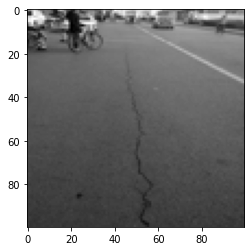

In [ ]:
# Exhibiting the original image from our final dataset
#df.loc[:, df.columns != 'b']
d = df_final.loc[1, df_final.columns != 'label'].values.reshape(100,100)
plt.imshow(d, cmap='gray')

plt.show()

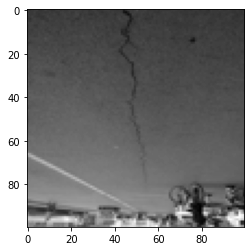

In [ ]:
# Rotate the original photo 180°

d = df_final.loc[156, df_final.columns != 'label'].values.reshape(100,100)
plt.imshow(d, cmap='gray')

plt.show()

**Showing how many rows and columns in our dataframe**

In [ ]:
pd.DataFrame(df_final.loc[1, df_final.columns != 'label'].values.reshape(100,100))

0      1      2      3      4   ...     95     96     97     98     99
0   163.0  169.0  202.0  226.0  210.0  ...  136.0  143.0  157.0  156.0  166.0
1    86.0   79.0  181.0  247.0  230.0  ...  127.0  161.0  156.0  155.0  162.0
2    79.0   75.0  170.0  247.0  233.0  ...  183.0  186.0  177.0  183.0  177.0
3   212.0  213.0  234.0  216.0  226.0  ...  211.0  209.0  207.0  206.0  205.0
4   230.0  240.0  253.0  255.0  245.0  ...  191.0  189.0  191.0  198.0  195.0
..    ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
95   91.0   96.0   91.0   91.0   91.0  ...   96.0   99.0   96.0   87.0   90.0
96   91.0   93.0   90.0   87.0   88.0  ...   90.0   92.0   99.0   94.0   92.0
97   90.0   90.0   90.0   86.0   89.0  ...   91.0   95.0   93.0   92.0   97.0
98   93.0   87.0   90.0   91.0   88.0  ...   90.0   97.0   92.0   93.0   92.0
99   90.0   87.0   89.0   93.0   89.0  ...   96.0   94.0   92.0   89.0   92.0

[100 rows x 100 columns]

**ACTIVITIES**

1.Shuffle the lines in the dataset ( we have to reshape for 448X448 to 100x100, losing the quality, but it compromises this step of experiment)

2.Creating a new dataset with filter for cleaning 

In [ ]:
#Shuffle the lines
df_final = df_final.sample(frac=1) 
df_final_filter = pd.concat([df_crack_filter, df_non_crack_filter], ignore_index=True)
df_final_filter = df_final_filter.sample(frac=1) 

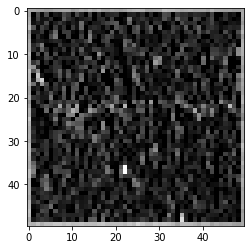

In [ ]:
# Original image with filter
d = df_final_filter.loc[2, df_final_filter.columns != 'label'].values.reshape(50,50)
plt.imshow(d, cmap='gray')

plt.show()

In [ ]:
# Exporting the Dataframes
#df_final.to_csv('df_final.csv', index=False)
#df_final_filter.to_csv('df_final_filter.csv', index=False)

**Start building a classification algoritm with Tensorflow and Keras using Machine Learning (Deep Learning area)**

The explanations are presented in Coursera's course: Introduction to TensorFlow for Artificial Intelligence, Machine Learning and Deep Learning. Using 70% of our images to train and 30% to validate to detecte cracks, oil spills and landslide.

Presented on https://github.com/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%208%20-%20Lesson%204%20-%20Notebook.ipynb
for humans X horses.

**SUCCESS ATTEMPT**

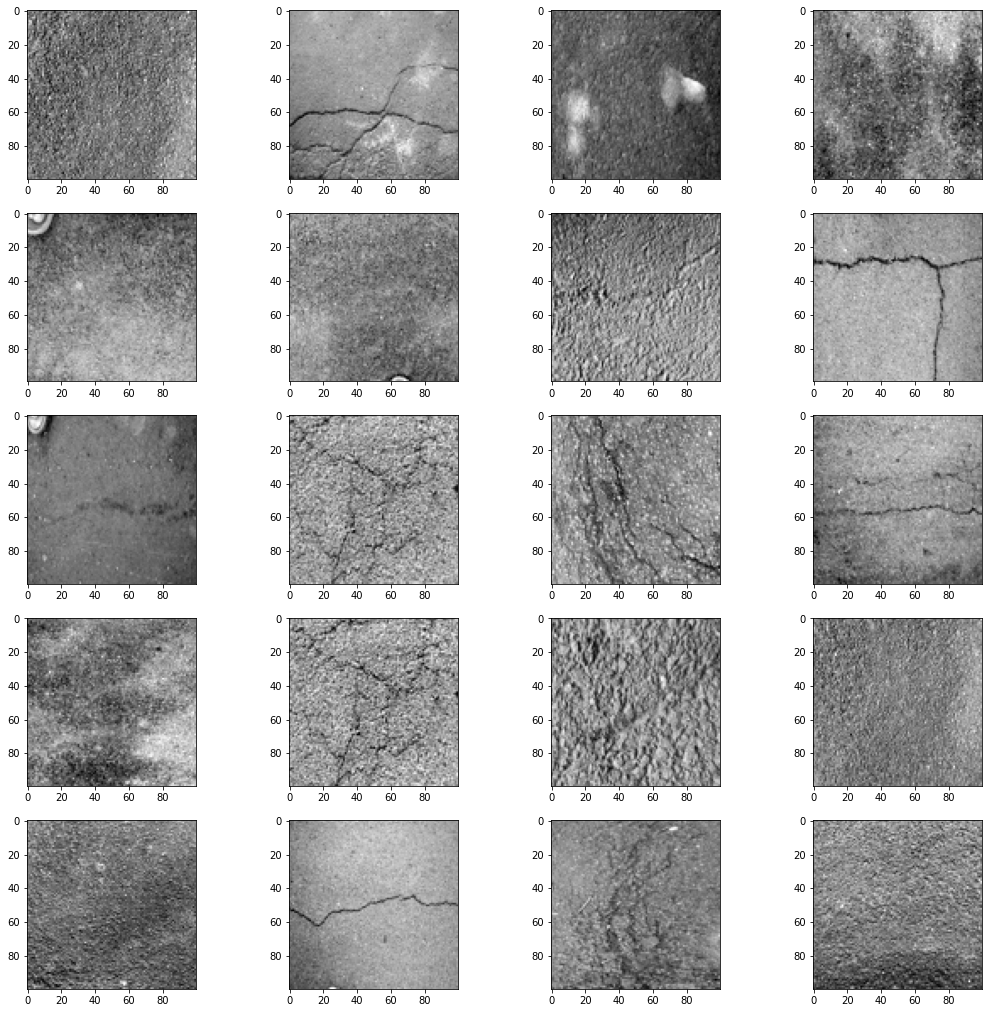

In [ ]:
# Crack and Non-Crack Images
w=10
h=10
fig=plt.figure(figsize=(18,18))
columns = 4
rows = 5
for i in range(1, columns*rows + 1):
    img = df_final.iloc[i,df_final.columns != 'label'].values.reshape(100,100)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
import tensorflow as tf
# Let's import the train_test_split from Scikit-Learn to split the dataframe into
# train and test data
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df_final.loc[:,df_final.columns != 'label'],
                                                   df_final.loc[:,df_final.columns == 'label'],
                                                   shuffle=False,
                                                   random_state=42)

# Let's convert the dataframe into numpy array and reshape it into a way that 
# TensorFlow can work with
X_train = (np.array(X_train).reshape(982,100,100,1))/255.0
X_test = (np.array(X_test).reshape(328,100,100,1))/255.0
y_train = np.array(y_train).flatten()
y_test = np.array(y_test).flatten()

print('X_train_shape:',X_train.shape)
print('X_test_shape:',X_test.shape)
print('y_train_shape:',y_train.shape)
print('y_test_shape:',y_test.shape)

X_train_shape: (982, 100, 100, 1)
X_test_shape: (328, 100, 100, 1)
y_train_shape: (982,)
y_test_shape: (328,)


In [ ]:
model = tf.keras.models.Sequential([
    # First Convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100,100,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    # Second Convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Third Convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(input_shape=(100,100)),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for class ('non-crack') and 1 for the other ('cracks')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(
    X_train, y_train, epochs=20
)

Epoch 1/20
31/31 [==============================] - 8s 273ms/step - loss: 0.8818 - accuracy: 0.5346
Epoch 2/20
31/31 [==============================] - 8s 271ms/step - loss: 0.6905 - accuracy: 0.5519
Epoch 3/20
31/31 [==============================] - 8s 271ms/step - loss: 0.6393 - accuracy: 0.5815
Epoch 4/20
31/31 [==============================] - 8s 273ms/step - loss: 0.6117 - accuracy: 0.6456
Epoch 5/20
31/31 [==============================] - 9s 278ms/step - loss: 0.5746 - accuracy: 0.6477
Epoch 6/20
31/31 [==============================] - 8s 269ms/step - loss: 0.5286 - accuracy: 0.7179
Epoch 7/20
31/31 [==============================] - 8s 268ms/step - loss: 0.5276 - accuracy: 0.7617
Epoch 8/20
31/31 [==============================] - 8s 271ms/step - loss: 0.4933 - accuracy: 0.7790
Epoch 9/20
31/31 [==============================] - 9s 277ms/step - loss: 0.4830 - accuracy: 0.7912
Epoch 10/20
31/31 [==============================] - 8s 270ms/step - loss: 0.3579 - accuracy: 0.8595

In [ ]:
history_test = model.fit(
    X_test, y_test, epochs=20
)

Epoch 1/20
11/11 [==============================] - 3s 250ms/step - loss: 0.2848 - accuracy: 0.8994
Epoch 2/20
11/11 [==============================] - 3s 230ms/step - loss: 0.3520 - accuracy: 0.8720
Epoch 3/20
11/11 [==============================] - 3s 248ms/step - loss: 0.3206 - accuracy: 0.8872
Epoch 4/20
11/11 [==============================] - 3s 254ms/step - loss: 0.1600 - accuracy: 0.9451
Epoch 5/20
11/11 [==============================] - 3s 243ms/step - loss: 0.5943 - accuracy: 0.8872
Epoch 6/20
11/11 [==============================] - 3s 237ms/step - loss: 0.2366 - accuracy: 0.9024
Epoch 7/20
11/11 [==============================] - 3s 259ms/step - loss: 0.1286 - accuracy: 0.9512
Epoch 8/20
11/11 [==============================] - 3s 245ms/step - loss: 0.2075 - accuracy: 0.9055
Epoch 9/20
11/11 [==============================] - 3s 250ms/step - loss: 0.1441 - accuracy: 0.9421
Epoch 10/20
11/11 [==============================] - 3s 257ms/step - loss: 0.1409 - accuracy: 0.9543

<Figure size 432x288 with 0 Axes>

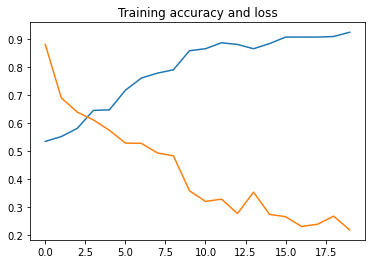

<Figure size 432x288 with 0 Axes>

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
loss     = history.history[    'loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs, acc )
plt.plot  ( epochs, loss )
plt.title ('Training accuracy and loss')
plt.figure()

In [ ]:
y_pred_train = model.predict(X_train)
for i in range(0,len(y_pred_train)-1,1):
    if (y_pred_train[i]>0.5):
        y_pred_train[i]=1
    else:
        y_pred_train[i]=0

y_pred_train = np.array(y_pred_train).flatten()
print(y_pred_train == y_train)
print(' ')
print('Percentage correct in train_set:',np.sum(y_pred_train == y_train)/len(y_train))

[ True  True  True False  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
 False False  True  True  True  True  True  True  True  True False  True
  True  True False  True  True  True  True  True False  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True False  True  True  True  True False False  True False  True  True
  True  True  True  True False  True  True False  True  True  True  True
  True False  True  True False False  True  True False  True  True  True
 False  True False  True  True  True  True  True  True False False  True
  True  True  True  True  True False  True  True  True  True False False
  True  True  True False  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True False  True  True
 False  True  True  True  True False  True  True Fa

In [ ]:
y_pred = model.predict(X_test)
for i in range(0,len(y_pred)-1,1):
    if (y_pred[i]>0.5):
        y_pred[i]=1
    else:
        y_pred[i]=0

y_pred = np.array(y_pred).flatten()
print(y_pred == y_test)
print(' ')
print('Percentage correct in test_set:',np.sum(y_pred == y_test)/len(y_test))

[ True  True False  True  True False  True False  True False  True False
  True  True False False False  True  True False  True  True  True  True
  True False  True False  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
 False  True  True  True  True  True False False  True  True False False
  True  True  True  True  True False  True  True  True  True False  True
  True False  True False False  True  True False False False  True  True
 False False False  True  True  True  True  True False False  True  True
  True  True  True  True  True  True  True  True  True False False False
  True False False False  True  True False  True  True False False  True
  True False  True  True False  True  True  True False False  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True False  True  True
 False  True  True  True  True  True  True  True  T

In [ ]:
# In this function we have to pass the img_name like a string and the output will be the 
# Image and the classification (crack or non-crack)
def image_classification(img_name):
    img_test = Image.open('/content/'+img_name,'r')
    img_test = img_test.convert('L')
    img_test = img_test.resize((100,100))

    img_test_data = np.asarray(img_test.getdata(), dtype=np.float64)
    img_test_data = (img_test_data.reshape(-1,100,100,1))/255.0

    plt.imshow(img_test, cmap='gray')

    img_pred = model.predict(img_test_data)
    if (img_pred>0.5):
        print('This is a crack image')
    else:
        print('This is not a crack image')

This is a crack image


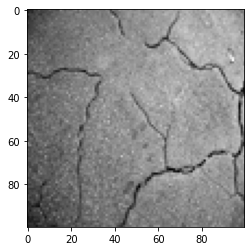

In [ ]:
image_classification('Cracked-Asphalt-Texture.jpg') #succeeded example

This is not a crack image


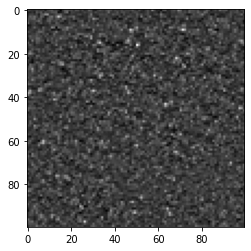

In [ ]:
image_classification('Seamless asphalt tarmac road tar texture ver 2.jpg') #succeeded example

This is a crack image


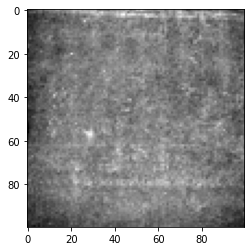

In [ ]:
image_classification('istockphoto-512329850-612x612.jpg') #ERROR/ FAILED EXAMPLE

## **Evaluating Accuracy and Loss for the Model**
Let's plot the training/validation accuracy and loss as collected during training:

*   verifying the bias and variance error in your model

<Figure size 432x288 with 0 Axes>

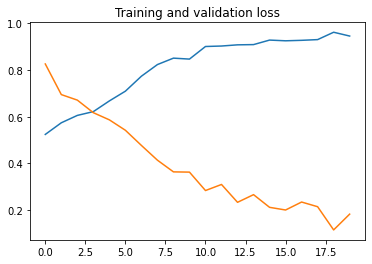

<Figure size 432x288 with 0 Axes>

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[ 'accuracy' ]
loss     = history.history[ 'loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs,     loss )
plt.title ('Training and validation loss')
plt.figure()


# **FAILED ATTEMPT**

In [ ]:
import os
import zipfile

local_zip = '/tmp/crack-or-not.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
local_zip = '/tmp/validate-crack-or-not.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

BadZipFile: ignored

In [ ]:
# Directory with our training asphalt cracked pictures
train_crack_dir = os.path.join('/tmp/crack-or-not/crack')

# Directory with our training asphalt not cracked pictures
train_not_crack_dir = os.path.join('/tmp/crack-or-not/not-crack')

# Directory with our training asphalt cracked pictures
validation_crack_dir = os.path.join('/tmp/validate-crack-or-not/crack')

# Directory with our training asphalt not cracked pictures
validation_not_crack_dir = os.path.join('/tmp/validate-crack-or-not/not-crack')

In [ ]:
train_crack_names = os.listdir(train_crack_dir)
train_not_crack_names = os.listdir(train_not_crack_dir)

validation_crack_names = os.listdir(validation_crack_dir)
validation_not_crack_names = os.listdir(validation_not_crack_dir)

In [ ]:
print('total training crack images:', len(os.listdir(train_crack_dir)))
print('total training not crack images:', len(os.listdir(train_not_crack_dir)))
print('total validation crack images:', len(os.listdir(validation_crack_dir)))
print('total validation not crack images:', len(os.listdir(validation_not_crack_dir)))

total training crack images: 248
total training not crack images: 140
total validation crack images: 106
total validation not crack images: 60


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

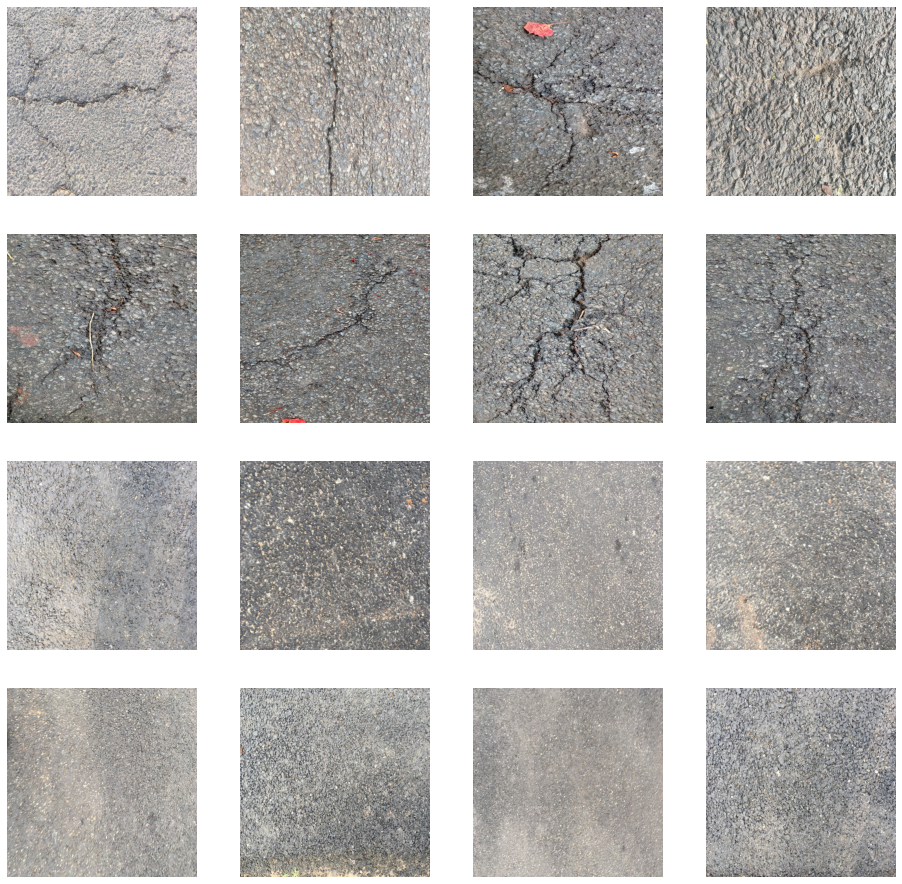

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_crack_pix = [os.path.join(train_crack_dir, fname) 
                for fname in train_crack_names[pic_index-8:pic_index]]
next_not_crack_pix = [os.path.join(train_not_crack_dir, fname) 
                for fname in train_not_crack_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_crack_pix+next_not_crack_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

**Building a Small Model from Scratch**

After import all datasets, let's start defining the model:


In [ ]:
import tensorflow as tf

We then add convolutional layers as in the previous example, and flatten the final result to feed into the densely connected layers.

Finally we add the densely connected layers.

Note that because we are facing a two-class classification problem, i.e. a binary classification problem, we will end our network with a sigmoid activation, so that the output of our network will be a single scalar between 0 and 1, encoding the probability that the current image is class 1 (as opposed to class 0).

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 33, 33, 64)       

The "output shape" column shows how the size of your feature map evolves in each successive layer. The convolution layers reduce the size of the feature maps by a bit due to padding, and each pooling layer halves the dimensions.

Next, we'll configure the specifications for model training. We will train our model with the binary_crossentropy loss, because it's a binary classification problem and our final activation is a sigmoid. (For a refresher on loss metrics, see the Machine Learning Crash Course.) We will use the rmsprop optimizer with a learning rate of 0.001. During training, we will want to monitor classification accuracy.

NOTE: In this case, using the RMSprop optimization algorithm is preferable to stochastic gradient descent (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as Adam and Adagrad, also automatically adapt the learning rate during training, and would work equally well here.)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator( #now using augmentation
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/crack-or-not',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        # batch_size=120,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validate-crack-or-not',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=8,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 388 images belonging to 2 classes.
Found 166 images belonging to 2 classes.


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 19s 2s/step - loss: 0.8377 - accuracy: 0.5833 - val_loss: 0.7080 - val_accuracy: 0.5781
Epoch 2/15
8/8 [==============================] - 21s 3s/step - loss: 0.6615 - accuracy: 0.6445 - val_loss: 0.6843 - val_accuracy: 0.5781
Epoch 3/15
8/8 [==============================] - 22s 3s/step - loss: 0.7556 - accuracy: 0.6289 - val_loss: 0.6480 - val_accuracy: 0.6875
Epoch 4/15
8/8 [==============================] - 21s 3s/step - loss: 0.6789 - accuracy: 0.6367 - val_loss: 0.6500 - val_accuracy: 0.6719
Epoch 5/15
8/8 [==============================] - 19s 2s/step - loss: 0.6773 - accuracy: 0.6316 - val_loss: 0.6452 - val_accuracy: 0.7031
Epoch 6/15
8/8 [==============================] - 18s 2s/step - loss: 0.6540 - accuracy: 0.6535 - val_loss: 0.6489 - val_accuracy: 0.6719
Epoch 7/15
8/8 [==============================] - 19s 2s/step - loss: 0.7255 - accuracy: 0.6316 - val_loss: 0.6713 - val_accuracy: 0.6406
Epoch 8/15
8/8 [==================

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is not crack")
  else:
    print(fn + " is a crack")

Saving Cracked-Asphalt-Texture.jpg to Cracked-Asphalt-Texture (1).jpg
[0.]
Cracked-Asphalt-Texture.jpg is a crack


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


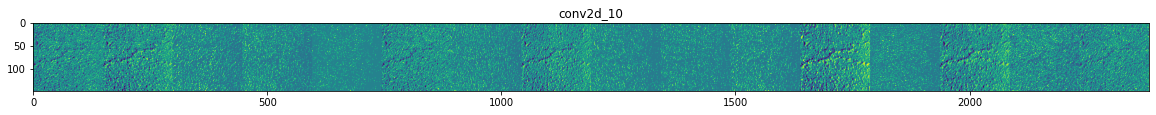

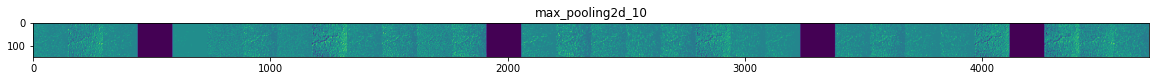

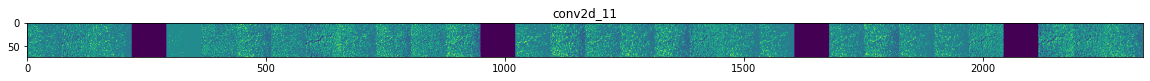

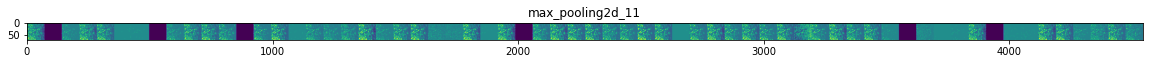

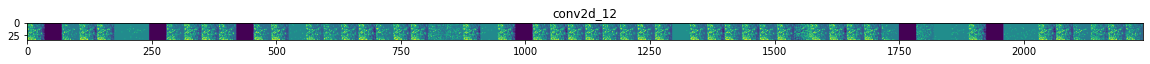

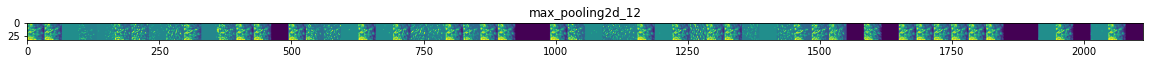

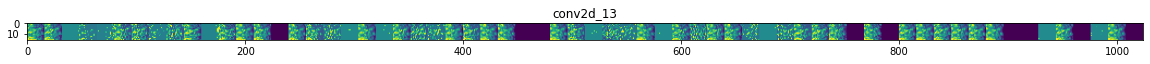

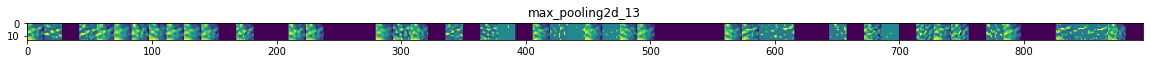

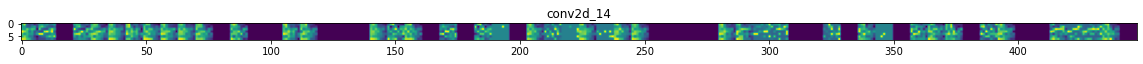

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
crack_img_files = [os.path.join(train_crack_dir, f) for f in train_crack_names]
not_crack_img_files = [os.path.join(train_not_crack_dir, f) for f in train_not_crack_names]
img_path = random.choice(crack_img_files + not_crack_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

**SUCCEDED ATTEMPT OF OIL SPILL DATASET**


using 
https://www.kaggle.com/damingo1/spill-data

In [ ]:
import os
import zipfile

local_zip = '/tmp/spill-or-not.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
local_zip = '//tmp/validation-spill-or-not.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [ ]:
# Directory with our training not oil spilled landscapes pictures
train_not_spill_dir = os.path.join('/tmp/spill-or-not/not-spill')

# Directory with our training oil spilled landscapes pictures
train_spill_dir = os.path.join('/tmp/spill-or-not/spill')

# Directory with our training not oil spilled landscapes pictures
validation_not_spill_dir = os.path.join('/tmp/validation-spill-or-not/not-spill')

# Directory with our training  oil spilled landscapes pictures
validation_spill_dir = os.path.join('/tmp/validation-spill-or-not/spill')

In [ ]:
train_not_spill_names = os.listdir(train_not_spill_dir)
print(train_not_spill_names[:10])

train_spill_names = os.listdir(train_spill_dir)
print(train_spill_names[:10])

validation_not_spill_hames = os.listdir(validation_not_spill_dir)
print(validation_not_spill_hames[:10])

validation_spill_names = os.listdir(validation_spill_dir)
print(validation_spill_names[:10])

['NoSpill_039.jpg', 'NoSpill_172.jpg', 'NoSpill_058.jpg', 'NoSpill_162.jpg', 'NoSpill_045.jpg', 'NoSpill_061.jpg', 'NoSpill_018.jpg', 'NoSpill_032.jpg', 'NoSpill_075.jpg', 'NoSpill_011.jpg']
['Oilspill_035.jpg', 'Oilspill_082.jpg', 'Oilspill_076.jpg', 'Oilspill_023.jpg', 'Oilspill_092.jpg', 'Oilspill_019.jpg', 'Oilspill_010.jpg', 'Oilspill_110.jpg', 'Oilspill_090.jpg', 'Oilspill_169.jpg']
['NoSpill_039.jpg', 'NoSpill_045.jpg', 'NoSpill_018.jpg', 'NoSpill_032.jpg', 'NoSpill_011.jpg', 'NoSpill_036.jpg', 'NoSpill_043.jpg', 'NoSpill_009.jpg', 'NoSpill_038.jpg', 'NoSpill_042.jpg']
['Oilspill_082.jpg', 'Oilspill_092.jpg', 'Oilspill_110.jpg', 'Oilspill_113.jpg', 'Oilspill_090.jpg', 'Oilspill_100.jpg', 'Oilspill_116.jpg', 'Oilspill_117.jpg', 'Oilspill_089.jpg', 'Oilspill_143.jpg']


In [ ]:
print('total training not oil spilled images:', len(os.listdir(train_not_spill_dir)))
print('total training oil spilled images:', len(os.listdir(train_spill_dir)))
print('total validation not oil spilled images:', len(os.listdir(validation_not_spill_dir)))
print('total validation oil spilled images:', len(os.listdir(validation_spill_dir)))

total training not oil spilled images: 132
total training oil spilled images: 168
total validation not oil spilled images: 42
total validation oil spilled images: 70


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

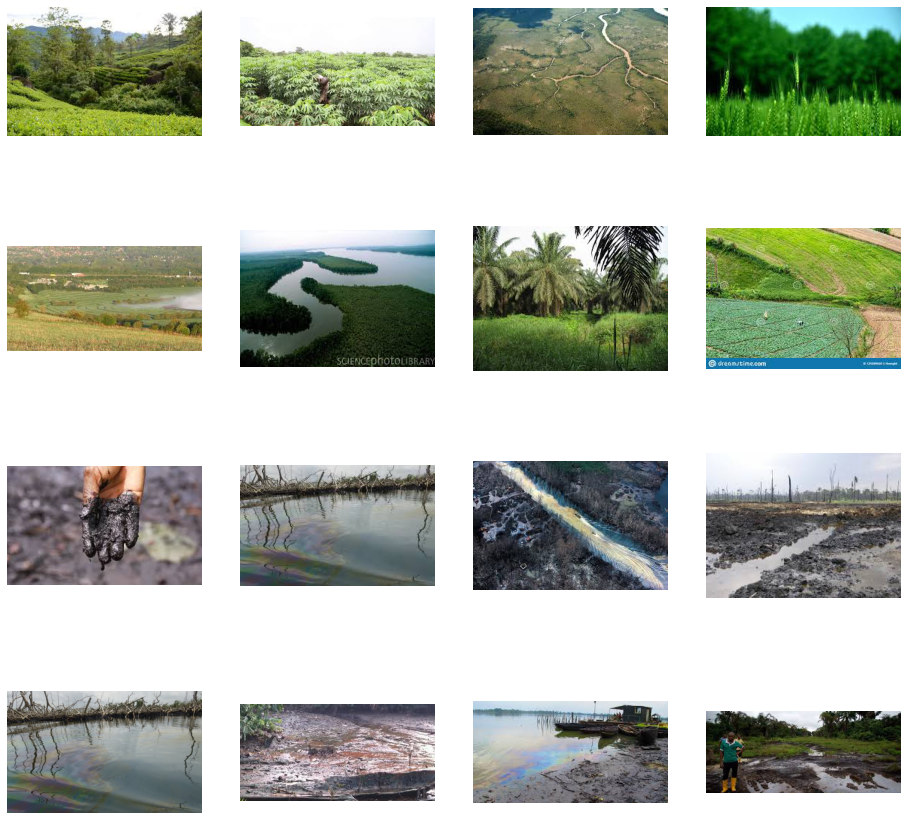

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_not_spill_pix = [os.path.join(train_not_spill_dir, fname) 
                for fname in train_not_spill_names[pic_index-8:pic_index]]
next_spill_pix = [os.path.join(train_spill_dir, fname) 
                for fname in train_spill_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_not_spill_pix+next_spill_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255) 
# train_datagen = ImageDataGenerator( now using augmentation
#       rotation_range=40,
#       width_shift_range=0.2,
#       height_shift_range=0.2,
#       shear_range=0.2,
#       zoom_range=0.2,
#       horizontal_flip=True,
#       fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/spill-or-not',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        # batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-spill-or-not/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=8,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 300 images belonging to 2 classes.
Found 112 images belonging to 2 classes.


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 18s 2s/step - loss: 1.0376 - accuracy: 0.5297 - val_loss: 0.6671 - val_accuracy: 0.6250
Epoch 2/15
8/8 [==============================] - 19s 2s/step - loss: 0.6632 - accuracy: 0.5466 - val_loss: 0.6983 - val_accuracy: 0.4219
Epoch 3/15
8/8 [==============================] - 21s 3s/step - loss: 0.6637 - accuracy: 0.5430 - val_loss: 0.5547 - val_accuracy: 0.8750
Epoch 4/15
8/8 [==============================] - 19s 2s/step - loss: 0.7104 - accuracy: 0.5932 - val_loss: 0.5281 - val_accuracy: 0.7656
Epoch 5/15
8/8 [==============================] - 18s 2s/step - loss: 0.5914 - accuracy: 0.7288 - val_loss: 0.3405 - val_accuracy: 0.8750
Epoch 6/15
8/8 [==============================] - 19s 2s/step - loss: 0.4452 - accuracy: 0.7754 - val_loss: 0.3694 - val_accuracy: 0.8438
Epoch 7/15
8/8 [==============================] - 20s 3s/step - loss: 0.4655 - accuracy: 0.7966 - val_loss: 0.2699 - val_accuracy: 0.8906
Epoch 8/15
8/8 [==================

In [ ]:
# history = model.fit(
#       train_generator,
#       steps_per_epoch=8,  
#       epochs=15,
#       verbose=1,
#       validation_data = validation_generator,
#       validation_steps=8)

Epoch 1/15
8/8 [==============================] - 23s 3s/step - loss: 58.4270 - accuracy: 0.5381 - val_loss: 0.6913 - val_accuracy: 0.6406
Epoch 2/15
8/8 [==============================] - 21s 3s/step - loss: 0.9564 - accuracy: 0.6653 - val_loss: 0.6912 - val_accuracy: 0.7656
Epoch 3/15
8/8 [==============================] - 21s 3s/step - loss: 0.6541 - accuracy: 0.6695 - val_loss: 0.6945 - val_accuracy: 0.3438
Epoch 4/15
8/8 [==============================] - 21s 3s/step - loss: 1.0197 - accuracy: 0.6737 - val_loss: 0.6894 - val_accuracy: 0.5781
Epoch 5/15
8/8 [==============================] - 21s 3s/step - loss: 0.9577 - accuracy: 0.5297 - val_loss: 0.6956 - val_accuracy: 0.3438
Epoch 6/15
8/8 [==============================] - 21s 3s/step - loss: 0.9153 - accuracy: 0.5636 - val_loss: 0.6973 - val_accuracy: 0.3438
Epoch 7/15
8/8 [==============================] - 21s 3s/step - loss: 1.5682 - accuracy: 0.5466 - val_loss: 0.6955 - val_accuracy: 0.4219
Epoch 8/15
8/8 [=================

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  # plt.imshow(img, cmap='gray')
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is an oil spilled landscape")
  else:
    print(fn + " is not oil spill landscape")
 

Saving Ideal-landscape.jpg to Ideal-landscape (1).jpg
[0.]
Ideal-landscape.jpg is not oil spilled


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


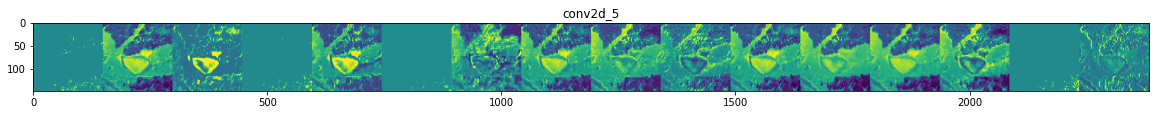

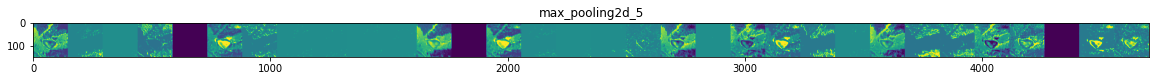

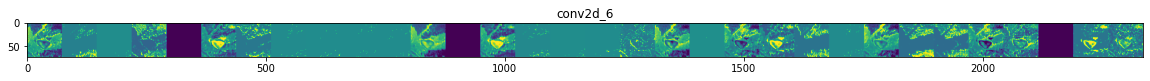

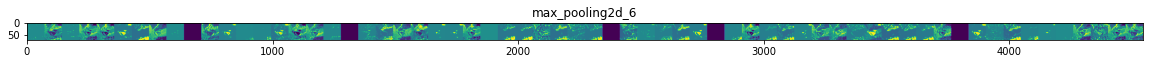

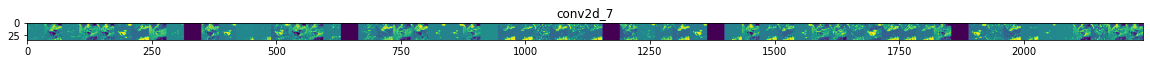

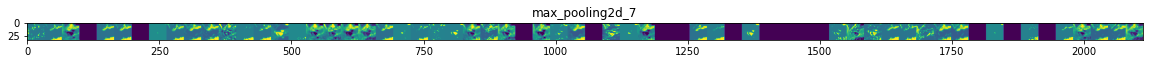

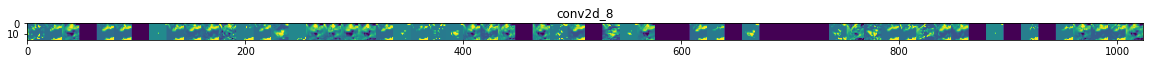

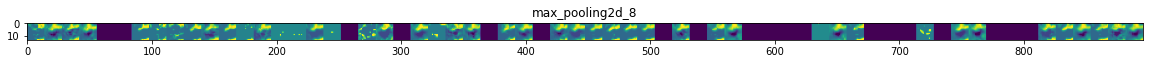

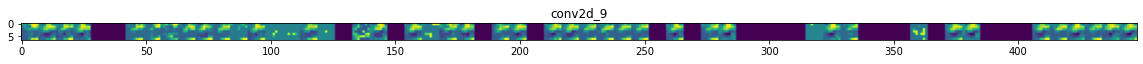

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
not_spill_img_files = [os.path.join(train_not_spill_dir, f) for f in train_not_spill_names]
spill_img_files = [os.path.join(train_spill_dir, f) for f in train_spill_names]
img_path = random.choice(not_spill_img_files + spill_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Text(0.5, 1.0, 'Training and validation loss')

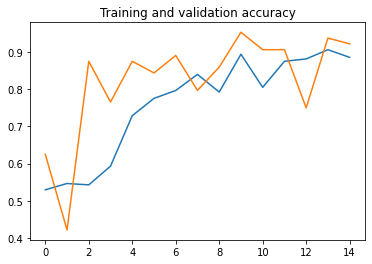

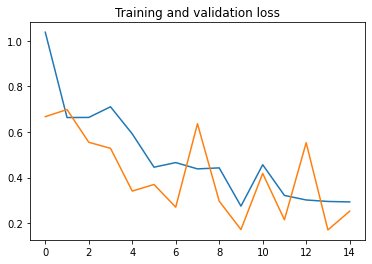

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

Text(0.5, 1.0, 'Training and validation loss')

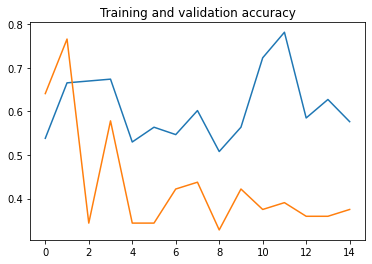

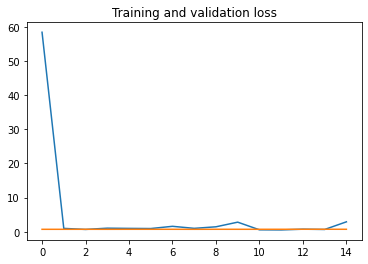

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch -AUGMENTATION TECNIQUE
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

As you can see, we are overfitting (variance problem). Our training accuracy (in blue) gets close to 95% (!) while our validation accuracy (in blue) stalls as 90%. Our validation loss reaches its minimum after 9 epochs.